Importing Required Libraries

In [20]:
%matplotlib inline
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#loading the data
df = pd.read_csv('train_open_iit.csv')
dataset = df
df.head()

Customer       State  ...  Vehicle Class Vehicle Size
0  BU79786  Washington  ...   Two-Door Car      Medsize
1  QZ44356     Arizona  ...  Four-Door Car      Medsize
2  AI49188      Nevada  ...   Two-Door Car      Medsize
3  WW63253  California  ...            SUV      Medsize
4  HB64268  Washington  ...  Four-Door Car      Medsize

[5 rows x 24 columns]

**DATA PREPROCESSING**

1-Firstly we will handle missing values in the dataset

In [21]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

No missing values are found

Let's carry on with preprocessing

2 - Basic data manipulation

In [22]:
#Renaming the columnns (removing space delimitation)
df = df.rename(columns = {'Customer Lifetime Value':'CLV', 'EmploymentStatus': 'EmploymentStatus', 'Location Code':'LocationCode', 'Marital Status': 'MaritalStatus','Monthly Premium Auto':'MonthlyPremiumAuto', 'Months Since Last Claim':'MonthsSinceLastClaim','Months Since Policy Inception':'MonthsSincePolicyInception','Number of Open Complaints':'NumberOfOpenComplaints','Number of Policies':'NumberofPolicies','Policy Type':'PolicyType','Policy':'PolicySubType','Renew Offer Type':'RenewOfferType','Sales Channel':'SalesChannel','Total Claim Amount':'TotalClaimAmount','Vehicle Class':'VehicleClass','Vehicle Size':'VehicleSize'})
dataset = dataset.rename(columns = {'Customer Lifetime Value':'CLV', 'EmploymentStatus': 'EmploymentStatus', 'Location Code':'LocationCode', 'Marital Status': 'MaritalStatus','Monthly Premium Auto':'MonthlyPremiumAuto', 'Months Since Last Claim':'MonthsSinceLastClaim','Months Since Policy Inception':'MonthsSincePolicyInception','Number of Open Complaints':'NumberOfOpenComplaints','Number of Policies':'NumberofPolicies','Policy Type':'PolicyType','Policy':'PolicySubType','Renew Offer Type':'RenewOfferType','Sales Channel':'SalesChannel','Total Claim Amount':'TotalClaimAmount','Vehicle Class':'VehicleClass','Vehicle Size':'VehicleSize'})

list(df.columns.values)

del df['Customer']
del df['Effective To Date']
del df['VehicleSize']

df.describe().transpose()

count          mean  ...           75%           max
CLV                         9134.0   8004.940475  ...   8962.167041  83325.381190
Income                      9134.0  37657.380009  ...  62320.000000  99981.000000
MonthlyPremiumAuto          9134.0     93.219291  ...    109.000000    298.000000
MonthsSinceLastClaim        9134.0     15.097000  ...     23.000000     35.000000
MonthsSincePolicyInception  9134.0     48.064594  ...     71.000000     99.000000
NumberOfOpenComplaints      9134.0      0.384388  ...      0.000000      5.000000
NumberofPolicies            9134.0      2.966170  ...      4.000000      9.000000
TotalClaimAmount            9134.0    434.088794  ...    547.514839   2893.239678

[8 rows x 8 columns]

3- Anamoly Detection and removal

In [23]:
#Now we will treat the outliers , by replacing those values with the median values (using Interuartile Method)
#Calculating Missing Values for CLV variable
first_quantile_CLV = df['CLV'].quantile(0.25)
third_quantile_CLV = df['CLV'].quantile(0.75)
IQR_CLV = third_quantile_CLV - first_quantile_CLV
#Range for Outliers
up_threshold_CLV=third_quantile_CLV+1.5*IQR_CLV
print("Upper Treshold of CLV: ",up_threshold_CLV)

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
print("Upper threshold of income:", up_threshold1)

# Removing anomalous datapoints 
# Where "MonthsSincePolicyInception" < "MonthsSinceLastClaim"  and there is only 1 or no policy
# Where Income is 0 and CLV is greater than upper threshold of CLV

i=0
inception = df['MonthsSincePolicyInception']
last = df['MonthsSinceLastClaim']
number = df ['NumberofPolicies']
for i in range (0,len(inception)):
    if ( ((inception[i]<last[i]) & (number[i]<2)) or ((df['Income'][i]<=0) & (df['CLV'][i]>16414.0)) ):
        df.drop([i], inplace=True)
        
df.head()

Upper Treshold of CLV:  16414.039911750002
Upper threshold of income: 155800.0


State           CLV  ... TotalClaimAmount   VehicleClass
1     Arizona   6979.535903  ...      1131.464935  Four-Door Car
2      Nevada  12887.431650  ...       566.472247   Two-Door Car
3  California   7645.861827  ...       529.881344            SUV
4  Washington   2813.692575  ...       138.130879  Four-Door Car
5      Oregon   8256.297800  ...       159.383042   Two-Door Car

[5 rows x 21 columns]

4 - Encoding categorical variables based on their correlation with CLV values

In [24]:
def corr_with_clv(col_name):
    dic={}
    no_cat,cat=(df[col_name].nunique(),df[col_name].unique())
    value_count=dict(df[col_name].value_counts())
    print(f'value counts = {value_count}')
    print("Correlation with CLV value")
    for i in range(no_cat):
        dic[cat[i]]=df.loc[df[col_name] == cat[i], 'CLV'].sum()/value_count[cat[i]]

    return dic
  
  
for col in df.columns:
  if df[col].dtype == 'object':
    print("Feature : ",col)   
    print(corr_with_clv(col))
    print()
    print()


Feature :  State
value counts = {'California': 2921, 'Oregon': 2393, 'Arizona': 1572, 'Nevada': 794, 'Washington': 732}
Correlation with CLV value
{'Arizona': 7794.210284903309, 'Nevada': 8071.1020027644845, 'California': 7820.598872972612, 'Washington': 7692.521876677596, 'Oregon': 8027.041039030923}


Feature :  Response
value counts = {'No': 7200, 'Yes': 1212}
Correlation with CLV value
{'No': 7890.672056017361, 'Yes': 7864.4548538118825}


Feature :  Coverage
value counts = {'Basic': 5140, 'Extended': 2516, 'Premium': 756}
Correlation with CLV value
{'Extended': 8672.351962149842, 'Premium': 10736.393177034393, 'Basic': 7083.308814696109}


Feature :  Education
value counts = {'Bachelor': 2536, 'College': 2442, 'High School or Below': 2415, 'Master': 689, 'Doctor': 330}
Correlation with CLV value
{'Bachelor': 7796.397207557176, 'College': 7717.1522294197375, 'Master': 8337.609240422353, 'High School or Below': 8082.7635034380955, 'Doctor': 7464.0072608575765}


Feature :  Employmen

For those features where score is nearly same for all classes we used one hot encoding while for those features where class scores are unbalanced we mapped the code codes manually

In [0]:
one_hot = pd.get_dummies(df['EmploymentStatus'])
df = df.join(one_hot)
del df['EmploymentStatus']

df.replace({'PolicySubType':{'Personal L3': 1, 'Corporate L2': 0, 'Personal L1': 1, 'Corporate L3': 0, 'Special L2': 2, 'Corporate L1': 2, 'Personal L2': 2, 'Special L1': 2, 'Special L3': 2}}, inplace=True)

one_hot = pd.get_dummies(df['MaritalStatus'])
df = df.join(one_hot)
del df['MaritalStatus']

one_hot = pd.get_dummies(df['LocationCode'])
df = df.join(one_hot)
del df['LocationCode']

one_hot = pd.get_dummies(df['Education'])
df = df.join(one_hot)
del df['Education']

one_hot = pd.get_dummies(df['SalesChannel'])
df = df.join(one_hot)
del df['SalesChannel']

df.replace({'RenewOfferType':{'Offer1':3 , 'Offer2':2 , 'Offer3':1 , 'Offer4':0}}, inplace=True)
df.replace({'Coverage':{'Basic':0 , 'Extended':1 , 'Premium':2 }}, inplace=True)
df.replace({'PolicyType':{'Personal Auto':0 , 'Corporate Auto':1 , 'Special Auto':2 }}, inplace=True)
encode = {"VehicleClass": {"Four-Door Car":0, "Two-Door Car":1,"SUV":2,"Sports Car":3,"Luxury SUV":5,"Luxury Car":4}}
df.replace(encode, inplace=True)

df.replace({'Gender':{'M':1 , 'F':0}}, inplace=True)

df.replace({'Response':{'Yes':1 , 'No':0}}, inplace=True)

one_hot = pd.get_dummies(df['State'])
df = df.join(one_hot)
del df['State']

In [26]:
df.head()

CLV  Response  Coverage  ...  Nevada  Oregon  Washington
1   6979.535903         0         1  ...       0       0           0
2  12887.431650         0         2  ...       1       0           0
3   7645.861827         0         0  ...       0       0           0
4   2813.692575         0         0  ...       0       0           1
5   8256.297800         1         0  ...       0       1           0

[5 rows x 40 columns]

5- Removing outlier using Interquantile range

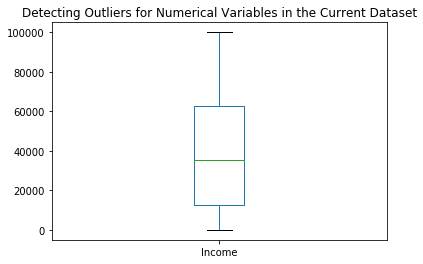

In [27]:
plot1 = df[['Income']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
up_threshold1
down_threshold1=first_quantile1-1.5*IQR1
down_threshold1
#Treatment
median1 = float(df['Income'].median())
median1
df["Income"] = np.where(df["Income"] >up_threshold1, median1,df['Income'])



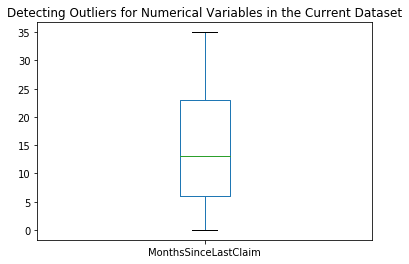

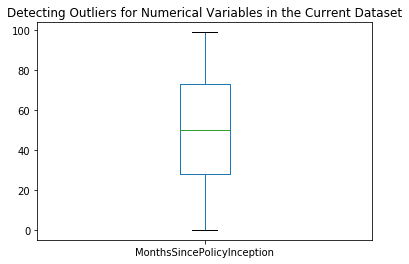

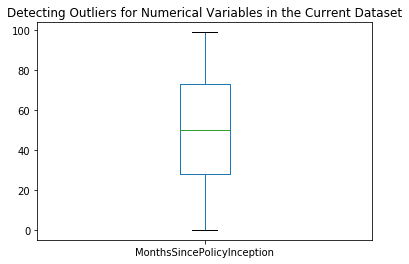

In [28]:
plot1 = df[['MonthsSinceLastClaim']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for No of Policies variable
first_quantile4 = df['NumberofPolicies'].quantile(0.25)
third_quantile4 = df['NumberofPolicies'].quantile(0.75)
IQR4 = third_quantile4 - first_quantile4
#Range for Outliers
up_threshold4=third_quantile4+1.5*IQR4
up_threshold4
down_threshold4=first_quantile4-1.5*IQR4
down_threshold4
#Treatment
median4 = float(df['NumberofPolicies'].median())
median4
df["NumberofPolicies"] = np.where(df["NumberofPolicies"] >up_threshold4, median4,df['NumberofPolicies'])



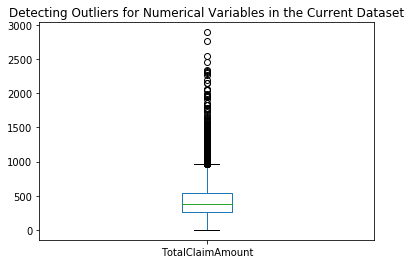

In [29]:
plot1 = df[['TotalClaimAmount']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Total Claim Amount variable
first_quantile3 = df['TotalClaimAmount'].quantile(0.25)
third_quantile3 = df['TotalClaimAmount'].quantile(0.75)
IQR3 = third_quantile3 - first_quantile3
#Range for Outliers
up_threshold3=third_quantile3+1.5*IQR3
up_threshold3
down_threshold3=first_quantile3-1.5*IQR3
down_threshold3
#Treatment
median3 = float(df['TotalClaimAmount'].median())
median3
df["TotalClaimAmount"] = np.where(df["TotalClaimAmount"] >up_threshold3, median3,df['TotalClaimAmount'])



In [30]:
df.describe().transpose()

count          mean  ...           75%           max
CLV                         8412.0   7886.894685  ...   8901.943166  83325.381190
Response                    8412.0      0.144080  ...      0.000000      1.000000
Coverage                    8412.0      0.478840  ...      1.000000      2.000000
Gender                      8412.0      0.488588  ...      1.000000      1.000000
Income                      8412.0  38548.397646  ...  62811.250000  99981.000000
MonthlyPremiumAuto          8412.0     92.832263  ...    109.000000    298.000000
MonthsSinceLastClaim        8412.0     14.640632  ...     23.000000     35.000000
MonthsSincePolicyInception  8412.0     50.371969  ...     73.000000     99.000000
NumberOfOpenComplaints      8412.0      0.389206  ...      0.000000      5.000000
NumberofPolicies            8412.0      2.763195  ...      3.000000      8.000000
PolicyType                  8412.0      0.296243  ...      1.000000      2.000000
PolicySubType               8412.0      1.136947  ...      2.000000      2.000000
RenewOfferType              8412.0      2.041845  ...      3.000000      3.000000
TotalClaimAmount            8412.0    384.730566  ...    509.203874    959.849922
VehicleClass                8412.0      0.917142  ...      2.000000      5.000000
Disabled                    8412.0      0.046006  ...      0.000000      1.000000
Employed                    8412.0      0.638968  ...      1.000000      1.000000
Medical Leave               8412.0      0.048027  ...      0.000000      1.000000
Retired                     8412.0      0.030670  ...      0.000000      1.000000
Unemployed                  8412.0      0.236329  ...      0.000000      1.000000
Divorced                    8412.0      0.151688  ...      0.000000      1.000000
Married                     8412.0      0.584879  ...      1.000000      1.000000
Single                      8412.0      0.263433  ...      1.000000      1.000000
Rural                       8412.0      0.199120  ...      0.000000      1.000000
Suburban                    8412.0      0.622206  ...      1.000000      1.000000
Urban                       8412.0      0.178673  ...      0.000000      1.000000
Bachelor                    8412.0      0.301474  ...      1.000000      1.000000
College                     8412.0      0.290300  ...      1.000000      1.000000
Doctor                      8412.0      0.039230  ...      0.000000      1.000000
High School or Below        8412.0      0.287090  ...      1.000000      1.000000
Master                      8412.0      0.081907  ...      0.000000      1.000000
Agent                       8412.0      0.382905  ...      1.000000      1.000000
Branch                      8412.0      0.277580  ...      1.000000      1.000000
Call Center                 8412.0      0.194841  ...      0.000000      1.000000
Web                         8412.0      0.144674  ...      0.000000      1.000000
Arizona                     8412.0      0.186876  ...      0.000000      1.000000
California                  8412.0      0.347242  ...      1.000000      1.000000
Nevada                      8412.0      0.094389  ...      0.000000      1.000000
Oregon                      8412.0      0.284475  ...      1.000000      1.000000
Washington                  8412.0      0.087019  ...      0.000000      1.000000

[40 rows x 8 columns]

Checking for Skewness and Kurtosis

In [31]:
df.skew()

CLV                           3.131516
Response                      2.027410
Coverage                      1.036836
Gender                        0.045669
Income                        0.259808
MonthlyPremiumAuto            2.138946
MonthsSinceLastClaim          0.333313
MonthsSincePolicyInception   -0.029014
NumberOfOpenComplaints        2.772523
NumberofPolicies              1.266963
PolicyType                    1.646512
PolicySubType                -0.181316
RenewOfferType               -0.733741
TotalClaimAmount              0.349880
VehicleClass                  1.340102
Disabled                      4.334900
Employed                     -0.578776
Medical Leave                 4.228310
Retired                       5.444893
Unemployed                    1.241532
Divorced                      1.942327
Married                      -0.344577
Single                        1.074286
Rural                         1.507158
Suburban                     -0.504205
Urban                    

In [32]:
df.kurtosis()

CLV                           15.062111
Response                       2.110895
Coverage                      -0.094295
Gender                        -1.998390
Income                        -1.082890
MonthlyPremiumAuto             6.329220
MonthsSinceLastClaim          -1.024296
MonthsSincePolicyInception    -1.069103
NumberOfOpenComplaints         7.646591
NumberofPolicies               0.513690
PolicyType                     1.780399
PolicySubType                 -0.877255
RenewOfferType                -0.601834
TotalClaimAmount              -0.078564
VehicleClass                   1.544670
Disabled                      16.795353
Employed                      -1.665415
Medical Leave                 15.882384
Retired                       27.653439
Unemployed                    -0.458707
Divorced                       1.773055
Married                       -1.881714
Single                        -0.846111
Rural                          0.271591
Suburban                      -1.746193


6- Scaling the features

In [33]:
#Now we will do Feature Scaling (using standard scalar)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df.iloc[:, 4:8 ] = min_max_scaler.fit_transform(df.iloc[:, 4:8])
df.iloc[:, 13:14 ] = min_max_scaler.fit_transform(df.iloc[:, 13:14])
df.head()

CLV  Response  Coverage  ...  Nevada  Oregon  Washington
1   6979.535903         0         1  ...       0       0           0
2  12887.431650         0         2  ...       1       0           0
3   7645.861827         0         0  ...       0       0           0
4   2813.692575         0         0  ...       0       0           1
5   8256.297800         1         0  ...       0       1           0

[5 rows x 40 columns]

**Data Visualisation**

Now we will interpret the data using various plots  

<Figure size 864x576 with 0 Axes>

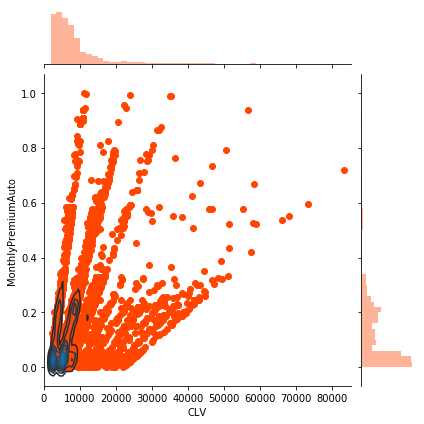

In [34]:
# Draw a scatterplot, then add a joint density estimate
plt.figure(figsize=(12,8))
ax = sns.jointplot(x="CLV", y="MonthlyPremiumAuto", data=df[['CLV','MonthlyPremiumAuto']],color='orangered')
ax.plot_joint(sns.kdeplot, zorder=1, n_levels=10)

From the density plot we infer data is heteroscedastic

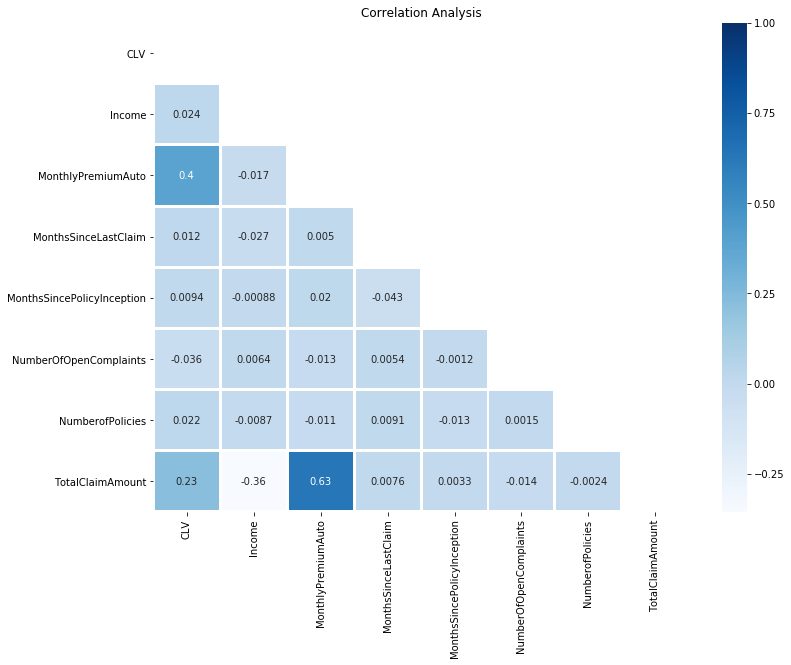

In [35]:
#Finding CORRELATION amongst Variables
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
dataset.corr(method = 'pearson')
plt.figure(figsize=(12,9))
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Analysis')
sns.heatmap(dataset.corr(), cmap='Blues', mask = mask, linewidths=2, annot=True)

No Strong correlation is found so autocorrelation and multicollinearty doesn't exists in dataset

Text(0.5, 1.0, 'CLV vs Total Claim')

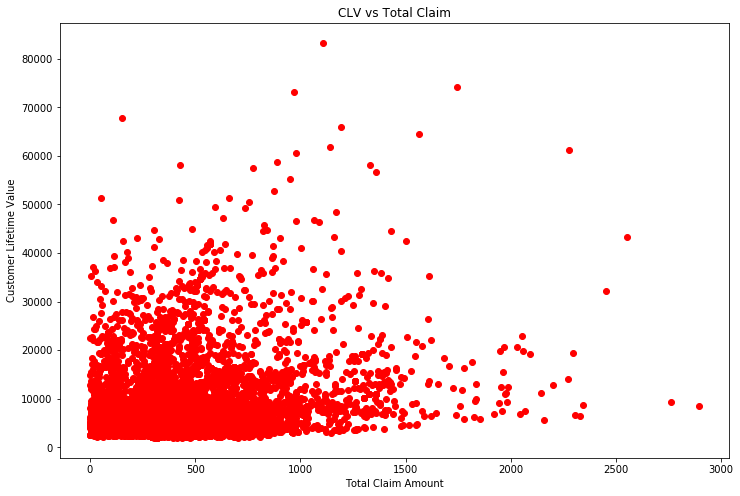

In [36]:
#Analyzing the relationship between CLV and Total Amount Claimed
plt.figure(figsize=(12,8))
plt.scatter(dataset['TotalClaimAmount'], dataset['CLV'], color='red')
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.title('CLV vs Total Claim')

Quite clearly, we can interprete that people who frequently make claims (and therefore have HIGHER TOTAL CLAIM AMOUNT)
have LOWER CLV values , ie. they are NON-PROFITABLE customers

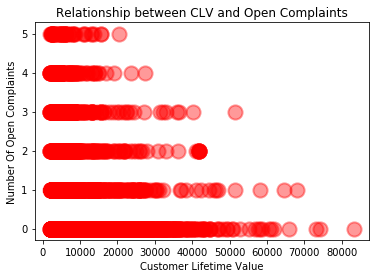

In [37]:
#Scatter plot analyzing CLV and Number of Open Complaints 

plt.scatter(dataset['CLV'], dataset['NumberOfOpenComplaints'], s=200, color='red', cmap="Greens", alpha=0.4, linewidth=2)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Number Of Open Complaints")
plt.title("Relationship between CLV and Open Complaints")
plt.rcParams["figure.figsize"] = (6, 4)

Quite clearly, number of open complaints negatively correlate with the customer lifetime value. 
Customer with MORE NUMBER OF COMPLAINTS is definitely DISSATISFIED and hence likely to be LESS BENEFICIAL for company profits.

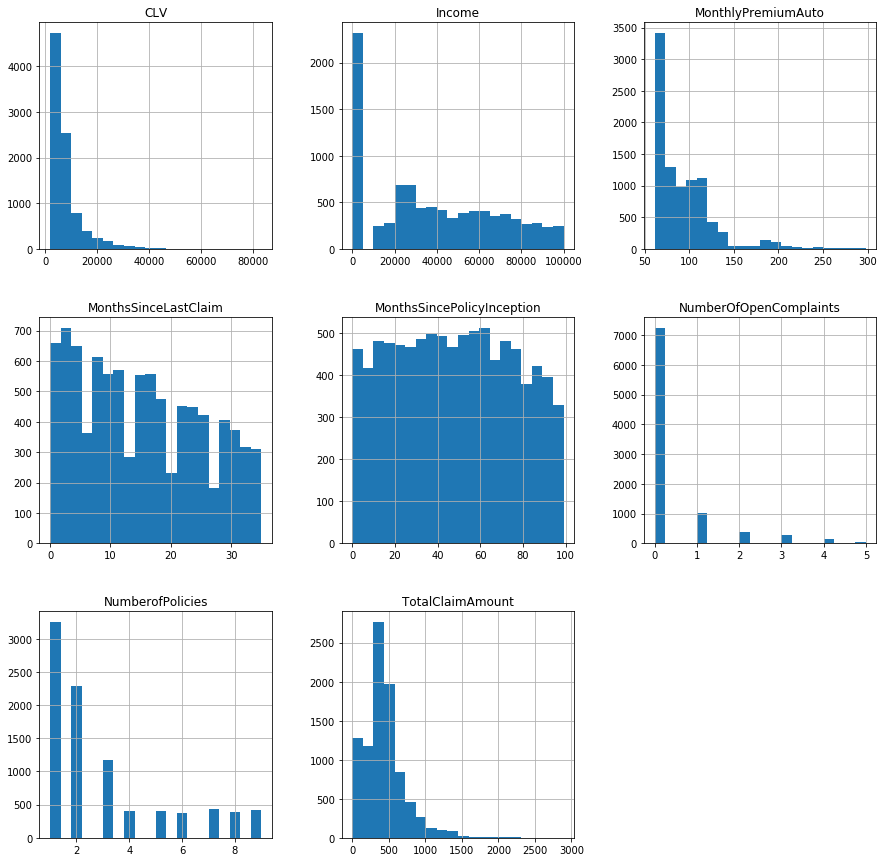

In [38]:
column_index = ['CLV','Income','MonthlyPremiumAuto','MonthsSinceLastClaim','MonthsSincePolicyInception','NumberOfOpenComplaints','NumberofPolicies','TotalClaimAmount']
histogram1 = dataset[column_index].hist(bins=20 , figsize = (15,15))

In [39]:
# Generate an aggregated DataFrame to represent the customer population by state
Customer_count_State = dataset[['State','Response']].groupby('State').count()

# Recode the index
Customer_count_State.index = ['Arizona','California','Nevada','Oregon','Washington']

# Show the aggregated DataFrame
Customer_count_State

Response
Arizona         1703
California      3150
Nevada           882
Oregon          2601
Washington       798

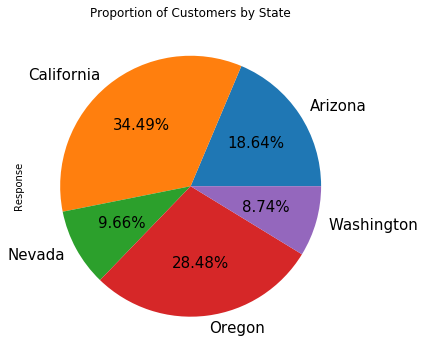

In [40]:
# Pie plot displaying the customer distribution across states
Customer_count_State['Response'].plot(kind='pie',autopct='%.2f%%',fontsize=15,figsize=(6,6))
plt.title('Proportion of Customers by State')
plt.show()

Text(0.5, 1.0, 'Impact of Sales Channel on CLV')

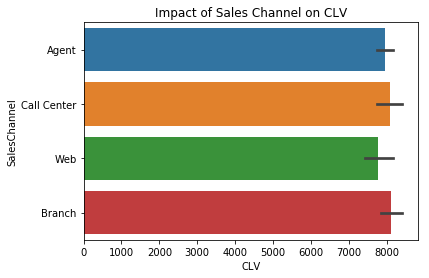

In [41]:
# Analyzing the Relationship between Sales Channel and Average CLV 
ax = sns.barplot(x="CLV", y="SalesChannel", data=dataset)
plt. title('Impact of Sales Channel on CLV')

Peope using CALL CENTER and BRANCH for automobile insurance policies have GREATER CLV compared to those who enrolled for insurance policies through other channels

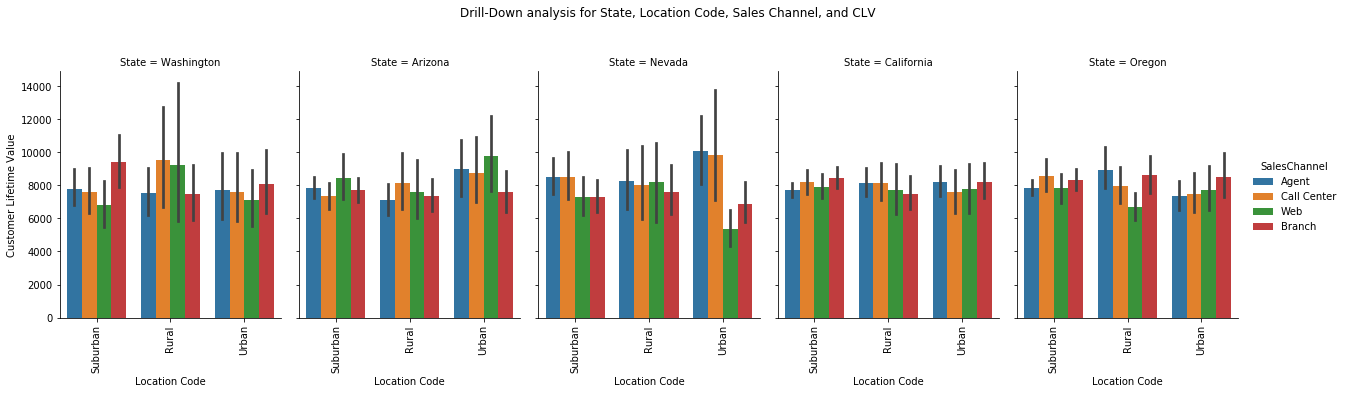

<Figure size 1440x1152 with 0 Axes>

In [42]:
# Further analysis of Sales Channel vs Average CLV for states based on location code
g = sns.factorplot(x="LocationCode", y="CLV",
                   hue="SalesChannel", col="State",
                   data=dataset, kind="bar", palette="tab10",
                   size=5, aspect=.7);
g.set_xticklabels(rotation=90)
g.set_xlabels("Location Code")
g.set_ylabels("Customer Lifetime Value")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Drill-Down analysis for State, Location Code, Sales Channel, and CLV')
plt.figure(figsize=(20,16))
plt.show()

Text(0.5, 1.0, 'Coverage vs Monthly Premium')

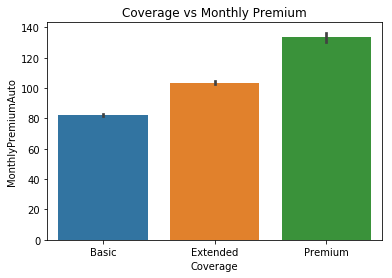

In [43]:
# Coverage type vs Average CLV
ax = sns.barplot(x="Coverage", y="MonthlyPremiumAuto", data=dataset)
plt. title('Coverage vs Monthly Premium')

Text(0.5, 1.0, 'Coverage vs CLV')

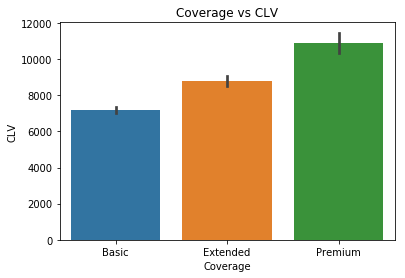

In [44]:
# Coverage type vs Average CLV
ax = sns.barplot(x="Coverage", y="CLV", data=dataset)
plt. title('Coverage vs CLV')

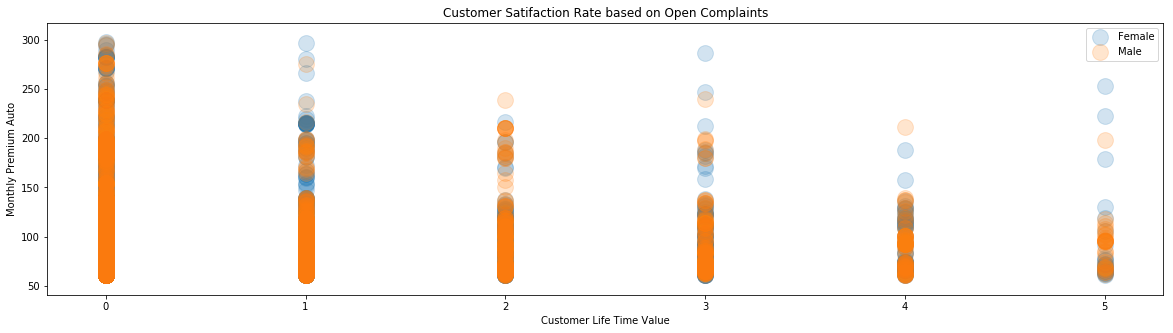

In [45]:
grouped = dataset.groupby('Gender')
fig, ax = plt.subplots(figsize=(20,5))
for name, group in grouped:
    ax.scatter(group.NumberOfOpenComplaints, group.MonthlyPremiumAuto, alpha = 0.2, s = 250)
ax.legend(['Female', 'Male'])
plt.xlabel('Customer Life Time Value')
plt.ylabel('Monthly Premium Auto')
plt.title('Customer Satifaction Rate based on Open Complaints')
plt.show()

The range of CLV payment OF MALES is a bit HIGHER
we can see that the nuber of complaints decrese for male customers from 0 to 5
Instead, an increase can be observed for female customers
WOMEN COMPLAIN MORE THAN MEN
Previously, we had observed that number of COMPLAINTS is NEGATIVELY CORRELATED with CLV

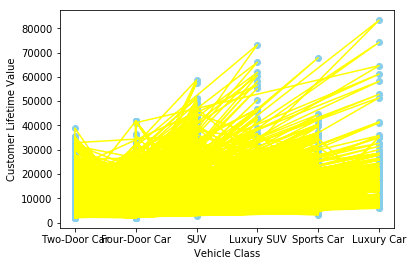

In [46]:
plt.scatter(dataset['VehicleClass'],dataset['CLV'],color='skyblue')
plt.plot(dataset['VehicleClass'],dataset['CLV'],color='yellow')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

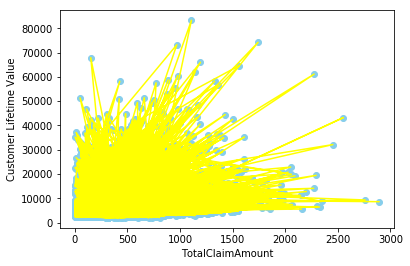

In [47]:
plt.scatter(dataset['TotalClaimAmount'],dataset['CLV'],color='skyblue')
plt.plot(dataset['TotalClaimAmount'],dataset['CLV'],color='yellow')
plt.xlabel('TotalClaimAmount')
plt.ylabel('Customer Lifetime Value')
plt.show()

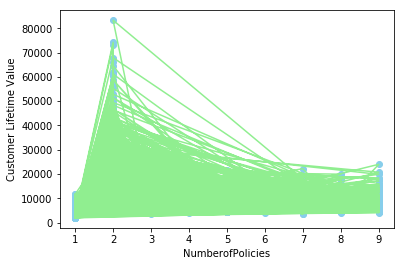

In [48]:
plt.scatter(dataset['NumberofPolicies'],dataset['CLV'],color='skyblue')
plt.plot(dataset['NumberofPolicies'],dataset['CLV'],color='lightgreen')
plt.xlabel('NumberofPolicies')
plt.ylabel('Customer Lifetime Value')
plt.show()

**Feature Engineering and Feature Selection**

Feature engineering is an essential part of building any intelligent system. Feature engineering is the process of transforming data into features to act as inputs for machine learning models such that good quality features help in improving the overall model performance.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [50]:
df.columns

Index(['CLV', 'Response', 'Coverage', 'Gender', 'Income', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberOfOpenComplaints', 'NumberofPolicies', 'PolicyType',
       'PolicySubType', 'RenewOfferType', 'TotalClaimAmount', 'VehicleClass',
       'Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed',
       'Divorced', 'Married', 'Single', 'Rural', 'Suburban', 'Urban',
       'Bachelor', 'College', 'Doctor', 'High School or Below', 'Master',
       'Agent', 'Branch', 'Call Center', 'Web', 'Arizona', 'California',
       'Nevada', 'Oregon', 'Washington'],
      dtype='object')

In [0]:
df['Profit'] = df['MonthlyPremiumAuto']*df['MonthsSincePolicyInception'] - df['TotalClaimAmount']
df['Income_monthly_auto']=df['Income']*df['MonthlyPremiumAuto']
df['monthly_with_Number_of_policies']=df['MonthlyPremiumAuto']*df['NumberofPolicies']


**Splitting the dataset**

In [0]:
X=df.drop("CLV",axis=1)
Y=df["CLV"]

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [0]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [55]:
alg=RandomForestRegressor()
alg.fit(X_train,Y_train)
y_pred=alg.predict(X_test)
r2=metrics.r2_score(Y_test, y_pred)
n=Y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)
print("R squared:",metrics.r2_score(Y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(Y_test,y_pred))

Adjusted r squared:  0.6641805567925415
R squared: 0.6558357493698529
MAPE: 12.567008782453149


In [0]:
params = {'min_child_weight':[4,5,6], 'gamma':[i/10.0 for i in range(3,10)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4,5,6,7,8,9]}
xgb = XGBRegressor(nthread=-1) 
grid = GridSearchCV(xgb, params)
grid.fit(X_train,Y_train)
y_pred_1 = grid.best_estimator_.predict(X_test)
r2=metrics.r2_score(Y_test, y_pred_1)
n=Y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)
print("R squared:",metrics.r2_score(Y_test,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(Y_test,y_pred_1)) 

[18:16:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re